# Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Exploration
df = pd.read_csv('../data/processed/cars_60k.csv')

print(f"\ncolumns: \n{df.columns}")

print(f"\ndtypes: \n{df.dtypes}")

print(f"\nnull counts\n {df.isnull().sum()}")

df.describe()



columns: 
Index(['car_id', 'prod_year', 'man_id', 'model_id', 'price', 'fuel_type_id',
       'gear_type_id', 'drive_type_id', 'color_id', 'cylinders', 'car_run_km',
       'engine_volume', 'abs', 'esd', 'el_windows', 'conditioner', 'leather',
       'hydraulics', 'chair_warming', 'climat_control', 'customs_passed',
       'tech_inspection', 'has_turbo', 'right_wheel', 'vehicle_type',
       'category_id', 'start_stop', 'back_camera', 'user_type',
       'comfort_features'],
      dtype='object')

dtypes: 
car_id               int64
prod_year            int64
man_id               int64
model_id             int64
price                int64
fuel_type_id         int64
gear_type_id         int64
drive_type_id        int64
color_id             int64
cylinders            int64
car_run_km           int64
engine_volume        int64
abs                 object
esd                 object
el_windows          object
conditioner         object
leather             object
hydraulics          object
c

/var/folders/yk/_pxs4k190zv7qyl1d8qf38x00000gn/T/ipykernel_3080/3191044077.py:2: DtypeWarning: Columns (12,13,14,15,16,17,18,19,20,21,22,23,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/cars_60k.csv')


,car_id,prod_year,man_id,model_id,price,fuel_type_id,gear_type_id,drive_type_id,color_id,cylinders,car_run_km,engine_volume,vehicle_type,category_id,user_type
count,6.133000e+04,61330.000000,61330.000000,61330.00000,61330.000000,61330.00000,61330.000000,61330.000000,61330.000000,61330.000000,6.133000e+04,61330.00000,61330.000000,61330.000000,61330.000000
mean,7.374174e+07,1979.924800,50.636377,809.65640,5973.070993,3.02242,1.669314,1.106261,6.827050,2.833361,2.199834e+05,1439.14303,0.463003,15.423316,0.557606
std,2.876782e+06,239.544894,57.148395,1150.86629,13578.550496,1.41193,0.894912,1.078023,6.390894,2.502369,8.673790e+06,1636.54742,0.498633,14.693564,0.496707
min,8.907839e+06,0.000000,1.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,1.000000,0.000000
25%,7.379209e+07,2004.000000,23.000000,0.00000,0.000000,2.00000,1.000000,0.000000,1.000000,0.000000,7.114000e+03,0.00000,0.000000,2.000000,0.000000
50%,7.438475e+07,2010.000000,31.000000,443.00000,2350.000000,3.00000,1.000000,1.000000,5.000000,4.000000,1.283605e+05,1500.00000,0.000000,7.000000,1.000000
75%,7.470665e+07,2014.000000,65.000000,1280.00000,6500.000000,3.00000,2.000000,2.000000,13.000000,4.000000,2.368000e+05,2200.00000,1.000000,27.000000,1.000000
max,7.498889e+07,2022.000000,549.000000,8585.00000,837559.000000,12.00000,4.000000,3.000000,21.000000,12.000000,2.147484e+09,20000.00000,1.000000,53.000000,2.000000


## some plots

### distributions

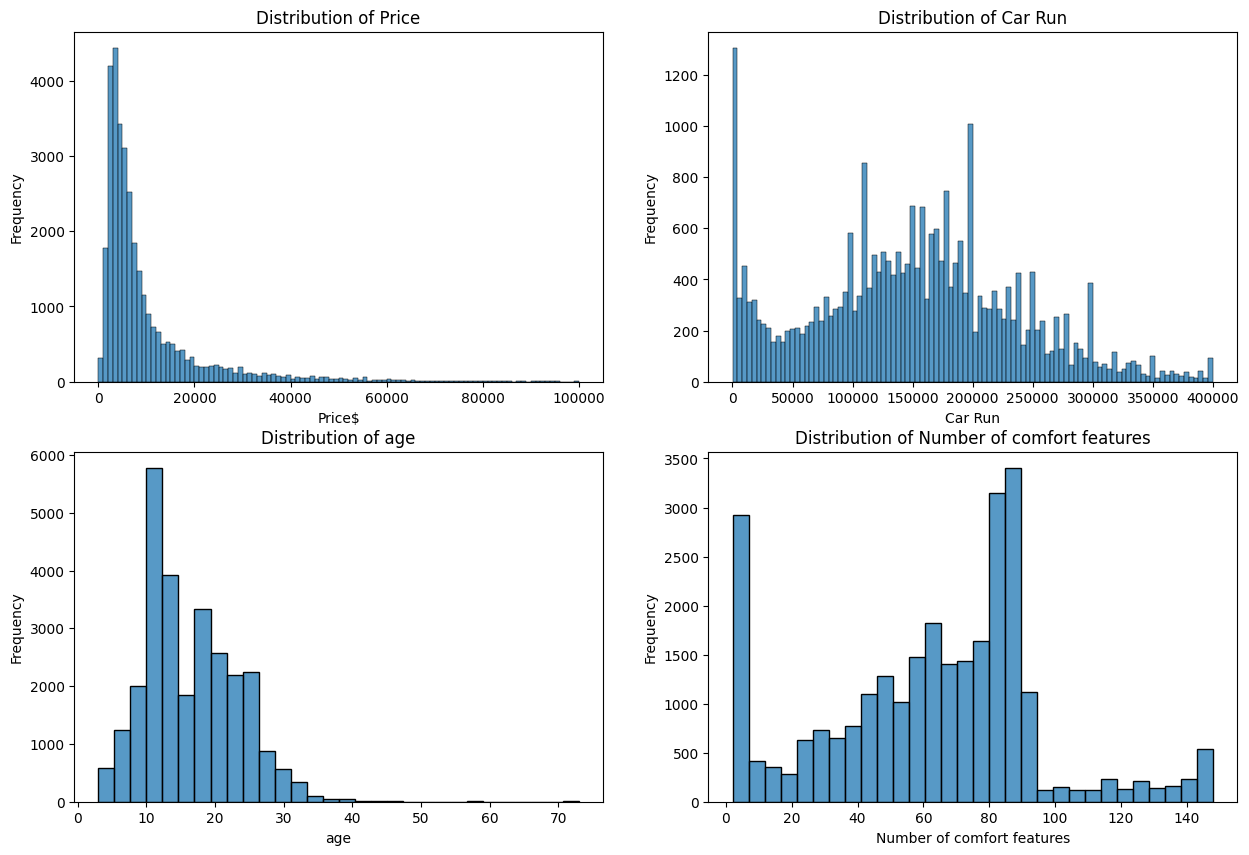

In [3]:
# distribution of the price column

plt.figure(figsize=(15, 10))
ax = plt.subplot(2, 2, 1)

# remove the rows with price less than 0 and greater than 100000 for proper visualization
X = df[(df['price'] > 0) & (df['price'] < 100000)]
sns.histplot(data=X, x="price", bins=100)
ax.set_xlabel("Price$")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Price")

ax = plt.subplot(2, 2, 2)
# distribution of the car_run_km column
X = X[(X['car_run_km'] > 10) & (X['car_run_km'] < 400001)]
sns.histplot(data=X, x="car_run_km", bins=100)
ax.set_xlabel("Car Run")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Car Run")

ax = plt.subplot(2, 2, 3)
# distribution of the age
X = X[X["prod_year"] > 1950]
X["age"] = 2025 - X['prod_year']
sns.histplot(data=X, x="age", bins=30)
ax.set_xlabel("age")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of age")

ax = plt.subplot(2, 2, 4)
# distribution of the number of comfort features
X['num_comfort_features'] = X['comfort_features'].apply(lambda x: len(x))
sns.histplot(data=X, x="num_comfort_features", bins=30)
ax.set_xlabel("Number of comfort features")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Number of comfort features")

plt.show()
